### Simple linear regression

#### Problem Statement:
You have been provided with a dataset containing information about students academic performance in their degree programs and their corresponding job placement outcomes in the terms of the packages received in lakhs per annum. Your task is to analyze the relationship between the percentages students received on their degree and the packages they receive as part of their job placements. Using simple linear regression.You aim to build a predictive model to estimate the packages received by students based on their academic performance percentages.

#### Dataset:
percentage(independent variable)

packages(dependent variable)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("Score_Placement.csv")
df

,percentage,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   percentage  200 non-null    float64
 1   package     200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [13]:
df.describe()

,percentage,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [14]:
df.shape

(200, 2)

### scatterplot
visualizing the relationship between the percentage and packages 

Text(0, 0.5, 'package')

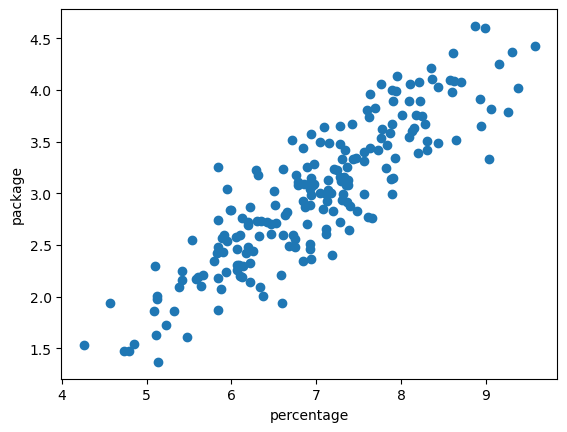

In [15]:
plt.scatter(df["percentage"],df["package"])
plt.xlabel("percentage")
plt.ylabel("package")

Results: It shows the positive linear relation between the percentages and packages
    
As the percentage increases, packages also increases 

### correlation

In [16]:
df.corr()

,percentage,package
percentage,1.000000,0.880692
package,0.880692,1.000000


In [17]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [18]:
X

,percentage
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [19]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

### Train_test_split
The train_test_split() method is used to split our data into train and test sets.

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
X_train.shape

(160, 1)

In [22]:
X_test.shape

(40, 1)

In [23]:
X_train.head()

,percentage
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [24]:
X_test.head()

,percentage
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [25]:
y_train.shape

(160,)

In [26]:
y_test.shape

(40,)

In [27]:
y_train.head()

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
Name: package, dtype: float64

In [28]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression

This code initialize the linear regression from the package of scikit learn package

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

By giving the lr.fit() to the training data, Machine will learn the pattern of the data

### y=mx+c
c = intercept
m = coefficient

In [32]:
lr.coef_

array([0.55795197])

In [33]:
lr.intercept_

-0.8961119222429144

#### predict always expect 2-D array

In [34]:
lr.predict([[7.15]])

array([3.09324469])

In [35]:
df.head()

,percentage,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

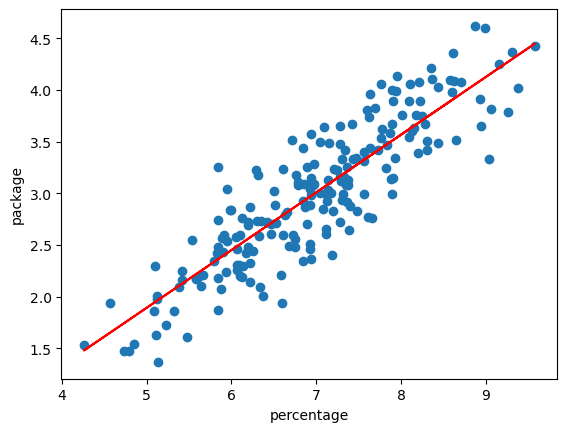

In [36]:
plt.scatter(df['percentage'],df['package'])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("percentage")
plt.ylabel('package')

### Model Evaluation

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Here we import three metrics from scikit learn packages for regressing model

In [38]:
y_pred=lr.predict(X_test)

In [39]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

### MAE

In [40]:
mean_absolute_error(y_test,y_pred)

0.2884710931878175

In [41]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


Above we calculate the Mean Absolute error between the y_test and y_pred

### MSE

In [42]:
mean_squared_error(y_test,y_pred)

0.12129235313495527

In [43]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


Above we calculate the mean squared error b\w the y_test and y_pred

### R2 score

In [44]:
import pandas as pd
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
RMSE=MSE ** 0.5
data_rmse = {"Actual(y_test)":y_test,"Predicted(y_pred)":y_pred}
df_rmse=pd.DataFrame(data_rmse)
df_rmse.head()

,Actual(y_test),Predicted(y_pred)
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729


Here we calculate the R2 score between the y_test and y_pred

06-05-2024

Today we learnt about the one of the regression algorithm i.e Linear Regression

First we understand the data and next did the initial check-up of the data

Initialize the Scatterplot between the percentage and packages 

then we calculate the correlation 

we did a model evaluation on the given the given data 

we import linear regression from the scikit learn package and predict the packages for corresponding percentages 

and we also import the 3-metrics mean_absolute_error,mean_squared_error,r2_score and calculate the mean absolute error , mean squared error and R2 score